## SEE_PY

- Zeus Elderfield
- Earl Rondina

## Instructions

Assignment 2 For Clustering: Sessa Empirical Estimator
1. Read the Journals about the Sessa Empirical Estimator.
2. Convert the R codes into Python Codes (use jupyter notebook).
3. Using Simulated data (https://www.frontiersin.org/journals/pharmacology/articles/10.3389/fphar.2019.00383/full) or a real world datasets of your choice (You can obtain it in Kaggle or in https://archive.ics.uci.edu/), perform the Sessa Empircal Estimator and generate some insights.
4. The Sessa Empirical Estimator uses K-Means clustering (again recall the disadvantages of K-Means), try to substitute a different clustering algorithm, generate a new insight using the new clustering algorithm.
5. Compare your results between Sessa Empirical Estimator using K-Means, and Sessa Empirical Estimator using the clustering algorithm of your choice.
6. Deadline is this Sunday, Feb 23, 2025 at 11:59 pm
7. Do this with your thesis partner.
8. You can use any A.I. assistant.

## Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Import dataset

In [32]:
# Simulated data is based from med.events
simulated_df = pd.read_csv('../data/med_events.csv')

simulated_df.tail()

,PATIENT_ID,DATE,PERDAY,CATEGORY,DURATION
1075,100,03/05/2034,6,medB,30
1076,100,04/07/2034,6,medB,30
1077,100,04/26/2034,6,medB,30
1078,100,05/26/2034,6,medB,30
1079,100,07/09/2034,4,medB,30


### Change column names to match R function

In [33]:
cols = ["pnr", "eksd", "perday", "ATC", "dur_original"]

simulated_df.columns = cols

simulated_df.head()

,pnr,eksd,perday,ATC,dur_original
0,1,04/26/2033,4,medA,50
1,1,07/04/2033,4,medB,30
2,1,08/03/2033,4,medB,30
3,1,08/17/2033,4,medB,30
4,1,10/13/2033,4,medB,30



### Convert eksd string to DateTime

In [34]:
simulated_df['eksd'] = pd.to_datetime(simulated_df['eksd'])

simulated_df.head()

,pnr,eksd,perday,ATC,dur_original
0,1,2033-04-26,4,medA,50
1,1,2033-07-04,4,medB,30
2,1,2033-08-03,4,medB,30
3,1,2033-08-17,4,medB,30
4,1,2033-10-13,4,medB,30


### Exploratory Data Analysis

#### I. Basic Information

In [35]:
simulated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pnr           1080 non-null   int64         
 1   eksd          1080 non-null   datetime64[ns]
 2   perday        1080 non-null   int64         
 3   ATC           1080 non-null   object        
 4   dur_original  1080 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.3+ KB


#### II. Check for missing values

In [36]:
simulated_df.isna().sum()

pnr             0
eksd            0
perday          0
ATC             0
dur_original    0
dtype: int64

#### III. Descriptive Statistics

In [37]:
simulated_df.describe()

,pnr,eksd,perday,dur_original
count,1080.000000,1080,1080.000000,1080.00000
mean,50.934259,2038-01-29 22:02:40,3.762963,47.37963
min,1.000000,2030-09-06 00:00:00,2.000000,20.00000
25%,24.000000,2035-06-03 06:00:00,2.000000,30.00000
50%,51.500000,2037-09-03 12:00:00,4.000000,50.00000
75%,78.000000,2041-05-05 00:00:00,4.000000,50.00000
max,100.000000,2044-09-03 00:00:00,20.000000,150.00000
std,29.999542,NaN,2.139552,22.08091


#### IV. Distribution of 'perday'

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


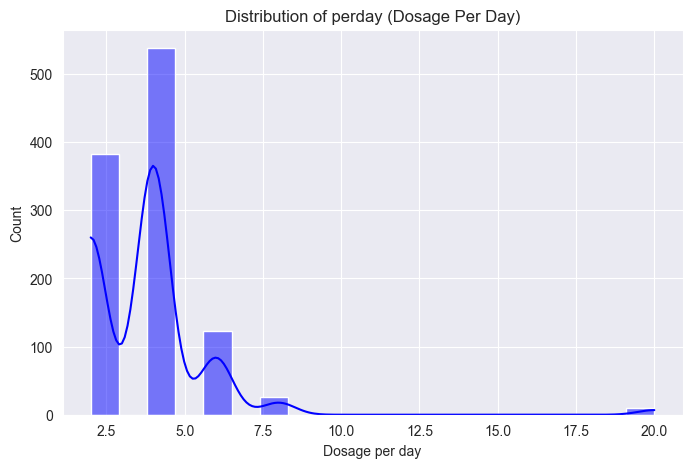

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(simulated_df['perday'], bins=20, kde=True, color='blue')
plt.title('Distribution of perday (Dosage Per Day)')
plt.xlabel('Dosage per day')
plt.ylabel('Count')
plt.show()


#### V. Distribution of 'dur_original'

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


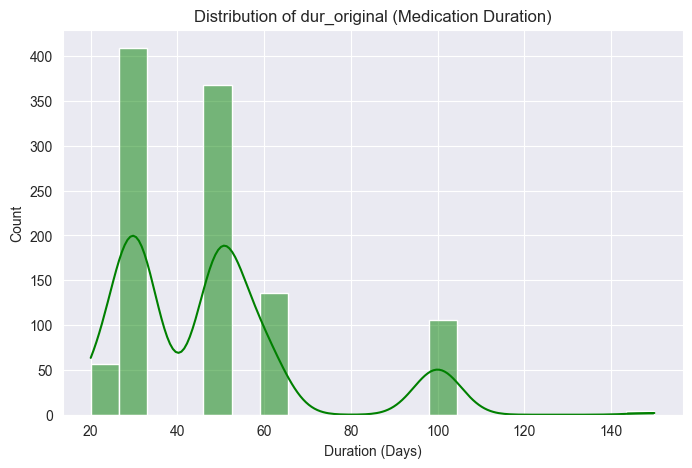

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(simulated_df['dur_original'], bins=20, kde=True, color='green')
plt.title('Distribution of dur_original (Medication Duration)')
plt.xlabel('Duration (Days)')
plt.ylabel('Count')
plt.show()

#### VI. Count of unique values in 'ATC'

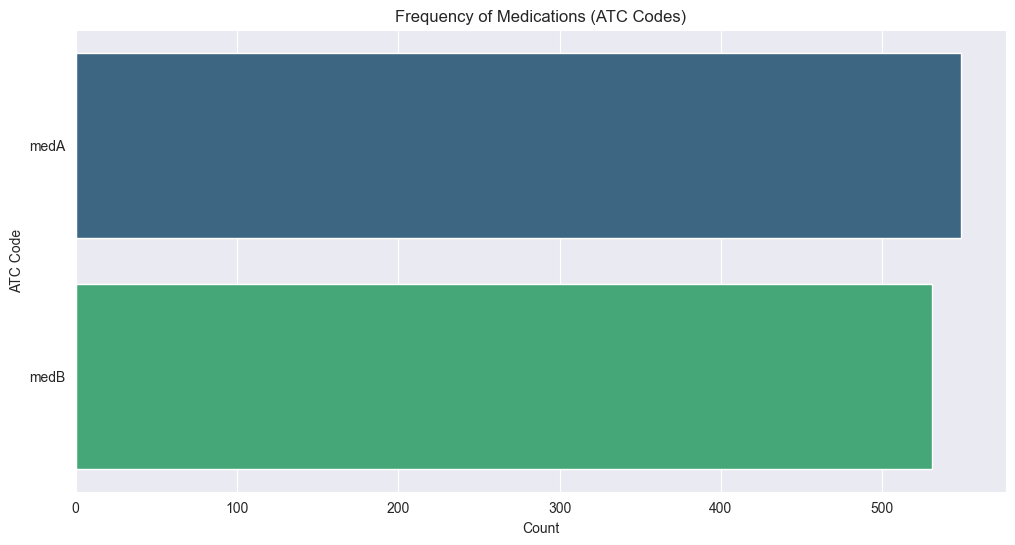

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(y=simulated_df['ATC'], order=simulated_df['ATC'].value_counts().index, palette="viridis")
plt.title('Frequency of Medications (ATC Codes)')
plt.xlabel('Count')
plt.ylabel('ATC Code')
plt.show()

#### VII. Trend of medication start dates over time

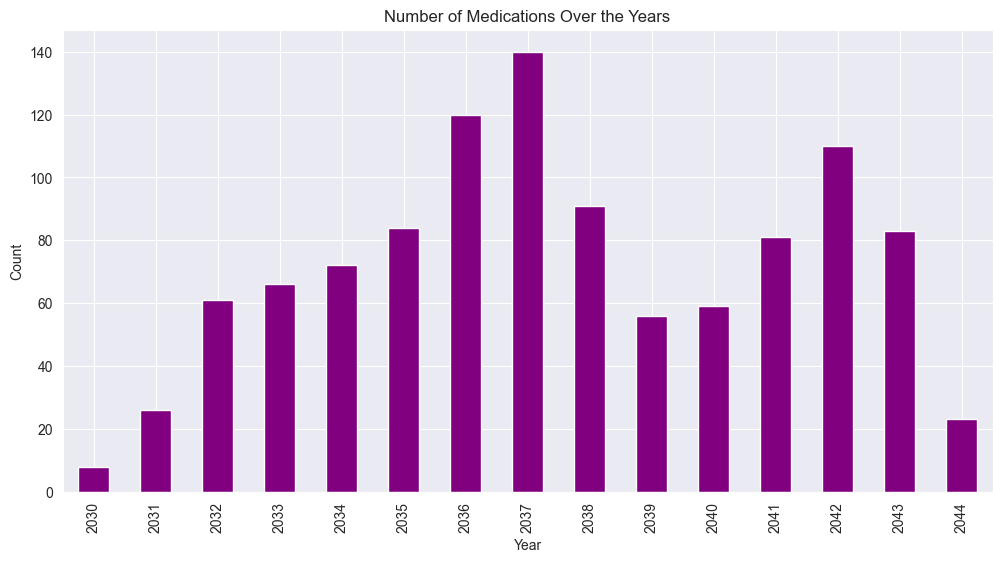

In [41]:
plt.figure(figsize=(12, 6))
simulated_df['eksd'].dt.year.value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Number of Medications Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### VIII. Boxplots to check outliers

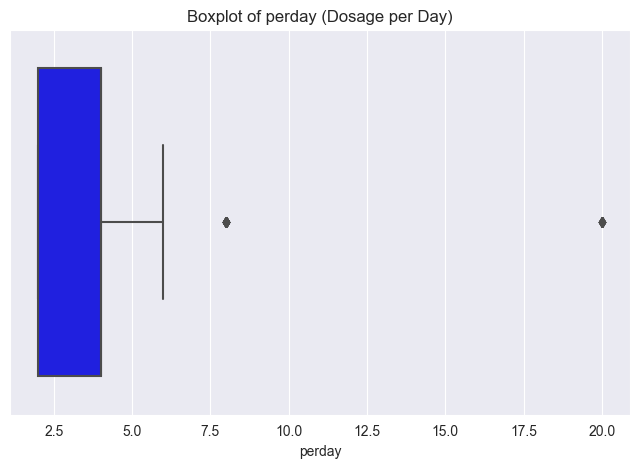

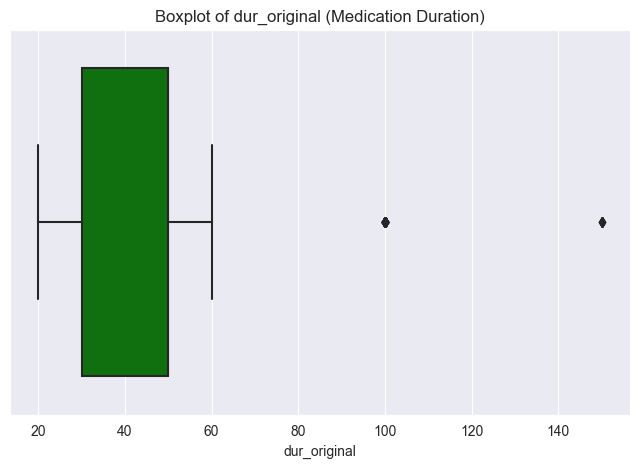

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=simulated_df['perday'], color='blue')
plt.title('Boxplot of perday (Dosage per Day)')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=simulated_df['dur_original'], color='green')
plt.title('Boxplot of dur_original (Medication Duration)')
plt.show()

#### IX. Correlation Heatmap

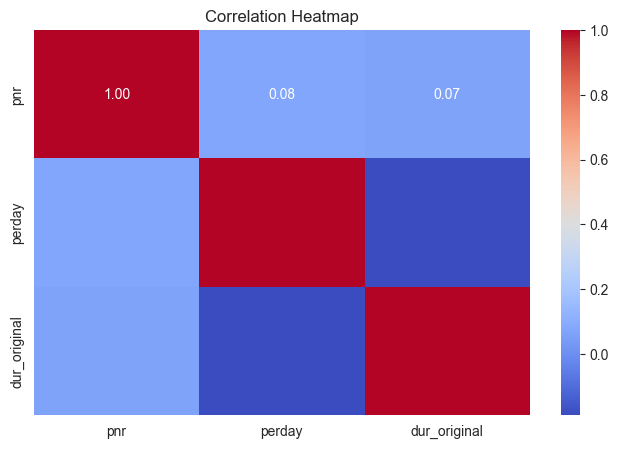

In [43]:
plt.figure(figsize=(8, 5))
sns.heatmap(simulated_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Define Function/s

#### I. Sessa Empirical Estimator using K-means clustering

In [44]:
def See_KMeans(arg1, tidy):
    # Filter rows where ATC equals arg1
    C09CA01 = tidy[tidy['ATC'] == arg1].copy()

    # Make working copies
    Drug_see_p0 = C09CA01.copy()
    Drug_see_p1 = C09CA01.copy()

    # Sort by 'pnr' and 'eksd' and create a lag of 'eksd' by group 'pnr'
    Drug_see_p1.sort_values(by=['pnr', 'eksd'], inplace=True)
    Drug_see_p1['prev_eksd'] = Drug_see_p1.groupby('pnr')['eksd'].shift(1)
    Drug_see_p1 = Drug_see_p1.dropna(subset=['prev_eksd'])

    # For each pnr group, randomly sample one row
    Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))

    # Keep only needed columns
    Drug_see_p1 = Drug_see_p1[['pnr', 'eksd', 'prev_eksd']].copy()

    # Compute the event interval (if eksd is datetime, compute days; otherwise, assume numeric)
    if np.issubdtype(Drug_see_p1['eksd'].dtype, np.datetime64):
        Drug_see_p1['event.interval'] = (Drug_see_p1['eksd'] - Drug_see_p1['prev_eksd']).dt.days
    else:
        Drug_see_p1['event.interval'] = Drug_see_p1['eksd'] - Drug_see_p1['prev_eksd']
    Drug_see_p1['event.interval'] = pd.to_numeric(Drug_see_p1['event.interval'])

    # --- ECDF Generation ---
    # Compute the empirical CDF for event.interval
    sorted_intervals = np.sort(Drug_see_p1['event.interval'].values)
    n = len(sorted_intervals)
    yvals = np.arange(1, n+1) / n
    dfper = pd.DataFrame({'x': sorted_intervals, 'y': yvals})

    # Retain the lower 80% of the ECDF
    dfper_80 = dfper[dfper['y'] <= 0.8].copy()
    ni = dfper_80['x'].max()  # maximum event interval in the 80% subset

    # Plot ECDFs
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].scatter(dfper_80['x'], dfper_80['y'])
    axs[0].set_title("80% ECDF")
    axs[0].set_xlabel("event.interval")
    axs[0].set_ylabel("ECDF")
    axs[1].scatter(dfper['x'], dfper['y'])
    axs[1].set_title("100% ECDF")
    axs[1].set_xlabel("event.interval")
    axs[1].set_ylabel("ECDF")
    plt.tight_layout()
    plt.show()

    # Plot frequency table for pnr counts
    m1 = Drug_see_p1['pnr'].value_counts()
    m1.plot(kind='bar', title="Frequency of pnr", figsize=(16, 6))
    plt.xlabel("pnr")
    plt.ylabel("Count")
    plt.show()

    # Subset to rows with event.interval <= ni (using the same dataframe as before)
    Drug_see_p2 = Drug_see_p1[Drug_see_p1['event.interval'] <= ni].copy()

    # --- Density Estimation on Log(event.interval) ---
    log_intervals = np.log(Drug_see_p2['event.interval'].values)
    kde = gaussian_kde(log_intervals)
    x1 = np.linspace(log_intervals.min(), log_intervals.max(), 100)
    y1 = kde(x1)

    plt.plot(x1, y1)
    plt.title("Density of log(event.interval)")
    plt.xlabel("log(event.interval)")
    plt.ylabel("Density")
    plt.show()

    # Prepare data for silhouette analysis: scale the density grid points
    a = pd.DataFrame({'x': x1, 'y': y1})
    scaler = StandardScaler()
    a_scaled = scaler.fit_transform(a)

    # --- Silhouette Analysis to determine optimal number of clusters ---
    # Try clustering with k from 2 to 10 (or up to the number of points)
    best_k = 2
    best_score = -1
    max_k = min(10, len(a_scaled))
    for k in range(2, max_k + 1):
        km = KMeans(n_clusters=k, random_state=1234)
        labels = km.fit_predict(a_scaled)
        score = silhouette_score(a_scaled, labels)
        if score > best_score:
            best_score = score
            best_k = k
    max_cluster = best_k

    # --- K-means Clustering on the ECDF x-values ---
    # Reshape x for clustering (one-dimensional)
    kmeans = KMeans(n_clusters=max_cluster, random_state=1234)
    dfper['cluster'] = kmeans.fit_predict(dfper[['x']])

    # Compute summary statistics (min, max, median) on log(x) for each cluster
    dfper['log_x'] = np.log(dfper['x'])
    summary = dfper.groupby('cluster')['log_x'].agg(['min', 'max', 'median']).reset_index()
    # Replace any -infinity with 0 if necessary
    summary['min'] = summary['min'].replace(-np.inf, 0)
    # Exponentiate to return to original scale
    summary['Minimum'] = np.exp(summary['min'])
    summary['Maximum'] = np.exp(summary['max'])
    summary['Median'] = np.exp(summary['median'])
    # Keep clusters with a positive median
    summary = summary[summary['Median'] > 0]

    # --- Cross-join with Drug_see_p1 and assign a cluster if event.interval falls within the cluster bounds ---
    Drug_see_p1['key'] = 1
    summary['key'] = 1
    cross = pd.merge(Drug_see_p1, summary, on='key')
    cross['Final_cluster'] = np.where(
        (cross['event.interval'] >= cross['Minimum']) & (cross['event.interval'] <= cross['Maximum']),
        cross['cluster'],
        np.nan
    )
    results = cross.dropna(subset=['Final_cluster']).copy()
    # Keep only the needed columns (using the cluster from ECDF, not Final_cluster, as in the R code)
    results = results[['pnr', 'Median', 'cluster']]

    # --- Choose the cluster with the highest frequency ---
    if not results.empty:
        top_cluster = results['cluster'].value_counts().idxmax()
        t1 = results[results['cluster'] == top_cluster].iloc[[0]].copy()
    else:
        t1 = pd.DataFrame({'cluster': [0], 'Median': [np.nan]})

    # --- Merge cluster results back into Drug_see_p1 ---
    Drug_see_p1 = pd.merge(Drug_see_p1, results, on='pnr', how='left', suffixes=('', '_res'))
    # Fill missing Median values with the top cluster’s median and missing clusters with 0
    top_median = t1['Median'].iloc[0] if not t1.empty else np.nan
    Drug_see_p1['Median'] = Drug_see_p1['Median'].fillna(top_median)
    Drug_see_p1['cluster'] = Drug_see_p1['cluster'].fillna(0)
    # Compute a test column as the difference between event.interval and Median (rounded to one decimal)
    Drug_see_p1['test'] = np.round(Drug_see_p1['event.interval'] - Drug_see_p1['Median'], 1)

    # Keep only pnr, Median, and cluster in a separate dataframe
    Drug_see_p3 = Drug_see_p1[['pnr', 'Median', 'cluster']].copy()

    # --- Merge back with the original copy (Drug_see_p0) ---
    Drug_see_p0 = pd.merge(Drug_see_p0, Drug_see_p3, on='pnr', how='left')
    Drug_see_p0['Median'] = Drug_see_p0['Median'].fillna(top_median)
    Drug_see_p0['cluster'] = Drug_see_p0['cluster'].fillna(0)

    return Drug_see_p0


#### II. Sessa Empirical Estimator using DBSCAN

In [45]:
def See_DBSCAN(arg1, tidy):
    # Filter rows where ATC equals arg1
    C09CA01 = tidy[tidy['ATC'] == arg1].copy()

    # Make working copies
    Drug_see_p0 = C09CA01.copy()
    Drug_see_p1 = C09CA01.copy()

    # Sort by 'pnr' and 'eksd' and create a lag of 'eksd' by group 'pnr'
    Drug_see_p1.sort_values(by=['pnr', 'eksd'], inplace=True)
    Drug_see_p1['prev_eksd'] = Drug_see_p1.groupby('pnr')['eksd'].shift(1)
    Drug_see_p1 = Drug_see_p1.dropna(subset=['prev_eksd'])

    # For each pnr group, randomly sample one row
    Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))

    # Keep only needed columns
    Drug_see_p1 = Drug_see_p1[['pnr', 'eksd', 'prev_eksd']].copy()

    # Compute the event interval (if eksd is datetime, compute days; otherwise, assume numeric)
    if np.issubdtype(Drug_see_p1['eksd'].dtype, np.datetime64):
        Drug_see_p1['event.interval'] = (Drug_see_p1['eksd'] - Drug_see_p1['prev_eksd']).dt.days
    else:
        Drug_see_p1['event.interval'] = Drug_see_p1['eksd'] - Drug_see_p1['prev_eksd']
    Drug_see_p1['event.interval'] = pd.to_numeric(Drug_see_p1['event.interval'])

    # --- ECDF Generation ---
    # Compute the empirical CDF for event.interval
    sorted_intervals = np.sort(Drug_see_p1['event.interval'].values)
    n = len(sorted_intervals)
    yvals = np.arange(1, n+1) / n
    dfper = pd.DataFrame({'x': sorted_intervals, 'y': yvals})

    # Retain the lower 80% of the ECDF
    dfper_80 = dfper[dfper['y'] <= 0.8].copy()
    ni = dfper_80['x'].max()  # maximum event interval in the 80% subset

    # Plot ECDFs
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].scatter(dfper_80['x'], dfper_80['y'])
    axs[0].set_title("80% ECDF")
    axs[0].set_xlabel("event.interval")
    axs[0].set_ylabel("ECDF")
    axs[1].scatter(dfper['x'], dfper['y'])
    axs[1].set_title("100% ECDF")
    axs[1].set_xlabel("event.interval")
    axs[1].set_ylabel("ECDF")
    plt.tight_layout()
    plt.show()

    # Plot frequency table for pnr counts
    m1 = Drug_see_p1['pnr'].value_counts()
    m1.plot(kind='bar', title="Frequency of pnr", figsize=(16, 6))
    plt.xlabel("pnr")
    plt.ylabel("Count")
    plt.show()

    # Subset to rows with event.interval <= ni
    Drug_see_p2 = Drug_see_p1[Drug_see_p1['event.interval'] <= ni].copy()

    # --- Density Estimation on Log(event.interval) ---
    log_intervals = np.log(Drug_see_p2['event.interval'].values)
    kde = gaussian_kde(log_intervals)
    x1 = np.linspace(log_intervals.min(), log_intervals.max(), 100)
    y1 = kde(x1)

    plt.plot(x1, y1)
    plt.title("Density of log(event.interval)")
    plt.xlabel("log(event.interval)")
    plt.ylabel("Density")
    plt.show()

    # --- DBSCAN Clustering on the ECDF x-values ---
    # We cluster the one-dimensional ECDF x-values. First, scale the data.
    X = dfper[['x']].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Grid search for optimal eps value
    best_eps = None
    best_score = -1
    eps_values = np.linspace(0.1, 2.0, 20)
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=5)
        labels = db.fit_predict(X_scaled)
        # Exclude noise points (-1) for silhouette scoring
        if len(set(labels)) - (1 if -1 in labels else 0) < 2:
            continue
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
    # Default eps if none produced valid clusters
    if best_eps is None:
        best_eps = 0.5

    # Run DBSCAN with the optimal eps
    db_final = DBSCAN(eps=best_eps, min_samples=5)
    labels_final = db_final.fit_predict(X_scaled)
    dfper['cluster'] = labels_final
    # Replace noise label (-1) with 0 for consistency
    # dfper['cluster'] = dfper['cluster'].apply(lambda x: x if x != -1 else 0)

    # Compute summary statistics (min, max, median) on log(x) for each cluster
    dfper['log_x'] = np.log(dfper['x'])
    summary = dfper.groupby('cluster')['log_x'].agg(['min', 'max', 'median']).reset_index()
    summary['min'] = summary['min'].replace(-np.inf, 0)
    summary['Minimum'] = np.exp(summary['min'])
    summary['Maximum'] = np.exp(summary['max'])
    summary['Median'] = np.exp(summary['median'])
    summary = summary[summary['Median'] > 0]

    # --- Cross-join with Drug_see_p1 and assign a cluster if event.interval falls within the cluster bounds ---
    Drug_see_p1['key'] = 1
    summary['key'] = 1
    cross = pd.merge(Drug_see_p1, summary, on='key')
    cross['Final_cluster'] = np.where(
        (cross['event.interval'] >= cross['Minimum']) & (cross['event.interval'] <= cross['Maximum']),
        cross['cluster'],
        np.nan
    )
    results = cross.dropna(subset=['Final_cluster']).copy()
    results = results[['pnr', 'Median', 'cluster']]

    # --- Choose the cluster with the highest frequency ---
    if not results.empty:
        top_cluster = results['cluster'].value_counts().idxmax()
        t1 = results[results['cluster'] == top_cluster].iloc[[0]].copy()
    else:
        t1 = pd.DataFrame({'cluster': [0], 'Median': [np.nan]})

    # --- Merge cluster results back into Drug_see_p1 ---
    Drug_see_p1 = pd.merge(Drug_see_p1, results, on='pnr', how='left', suffixes=('', '_res'))
    top_median = t1['Median'].iloc[0] if not t1.empty else np.nan
    Drug_see_p1['Median'] = Drug_see_p1['Median'].fillna(top_median)
    Drug_see_p1['cluster'] = Drug_see_p1['cluster'].fillna(0)
    Drug_see_p1['test'] = np.round(Drug_see_p1['event.interval'] - Drug_see_p1['Median'], 1)

    Drug_see_p3 = Drug_see_p1[['pnr', 'Median', 'cluster']].copy()

    Drug_see_p0 = pd.merge(Drug_see_p0, Drug_see_p3, on='pnr', how='left')
    Drug_see_p0['Median'] = Drug_see_p0['Median'].fillna(top_median)
    Drug_see_p0['cluster'] = Drug_see_p0['cluster'].fillna(0)

    return Drug_see_p0


#### III. SEE Assumption

In [46]:
def see_assumption(arg1):
    # Ensure data is sorted by 'pnr' and 'eksd'
    arg1 = arg1.sort_values(by=['pnr', 'eksd']).copy()

    # Create lag column 'prev_eksd' for each patient group
    arg1['prev_eksd'] = arg1.groupby('pnr')['eksd'].shift(1)

    # Create a sequential prescription number for each patient (starting at 1)
    arg1['p_number'] = arg1.groupby('pnr').cumcount() + 1

    # Filter to keep only rows where p_number is 2 or higher
    Drug_see2 = arg1[arg1['p_number'] >= 2].copy()

    # Select only the needed columns
    Drug_see2 = Drug_see2[['pnr', 'eksd', 'prev_eksd', 'p_number']]

    # Calculate Duration as the difference in days between eksd and prev_eksd
    Drug_see2['Duration'] = (Drug_see2['eksd'] - Drug_see2['prev_eksd']).dt.days

    # Convert p_number to a categorical type (like a factor in R)
    Drug_see2['p_number'] = Drug_see2['p_number'].astype('category')

    # Create a boxplot of Duration versus p_number
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x='p_number', y='Duration', data=Drug_see2, ax=ax)
    ax.set_title("Boxplot of Duration by p_number")

    # Compute the median duration for each patient (pnr)
    medians_of_medians = (
        Drug_see2.groupby('pnr')['Duration']
        .median()
        .reset_index(name='median_duration')
    )

    # Plot a horizontal dashed red line for each patient's median duration
    # (Note: This may add many lines if there are many patients.)
    # for med in medians_of_medians['median_duration']:
    ax.axhline(y=medians_of_medians['median_duration'].median(), color='red', linestyle='dashed', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return fig

### Simulate

#### I. Sessa Empirical Estimator using K Means

##### A. ATC = medA

C:\Users\Zeus\AppData\Local\Temp\ipykernel_54764\209281623.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))


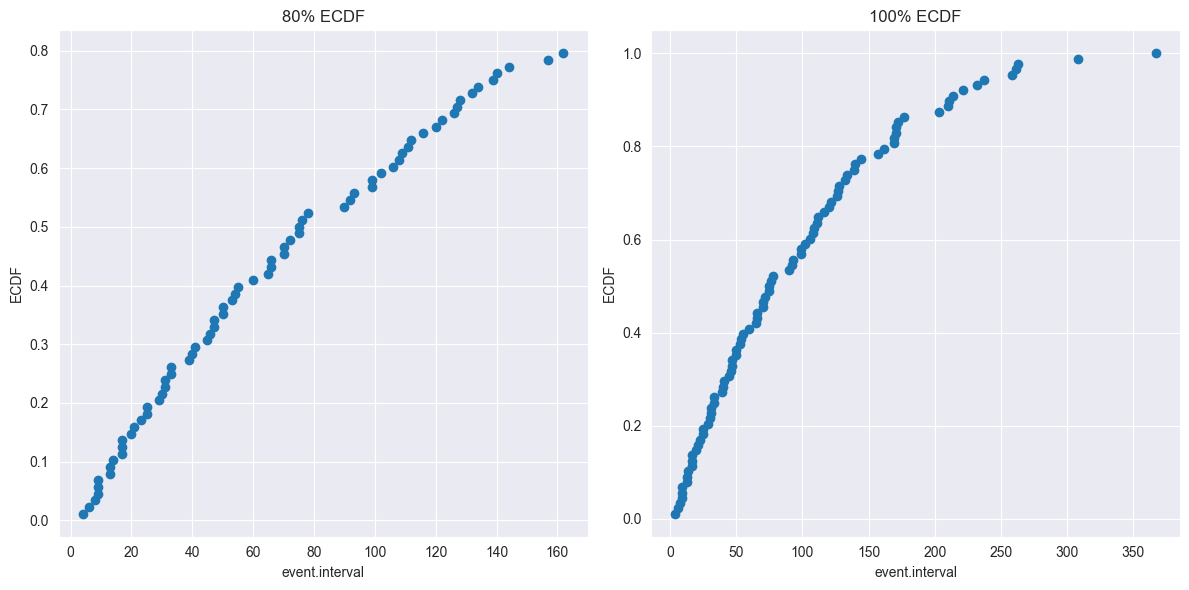

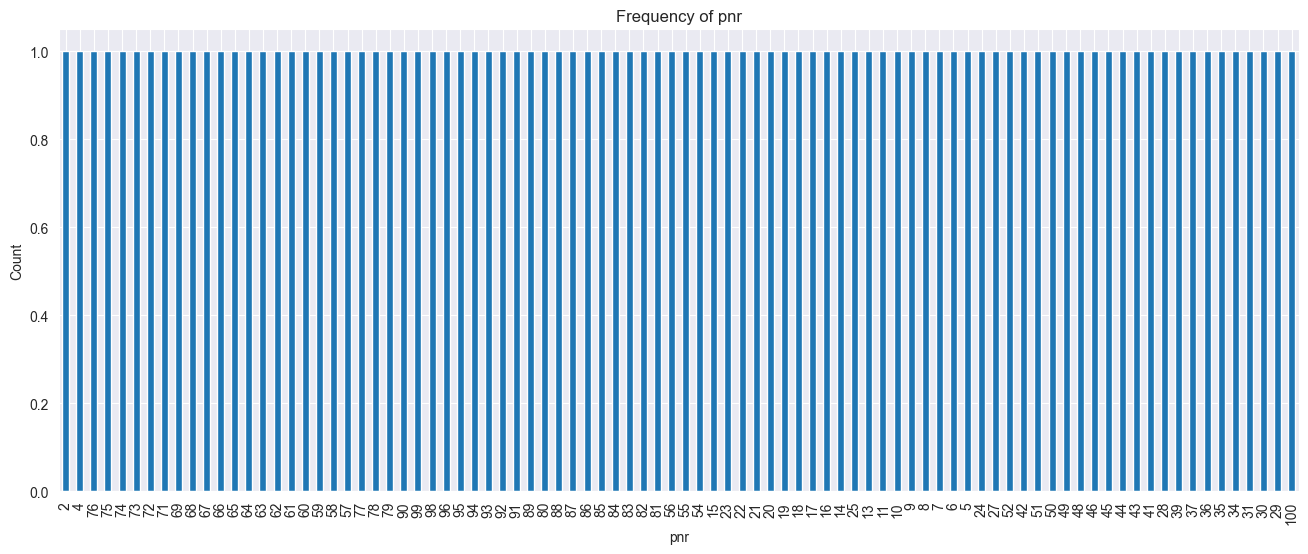

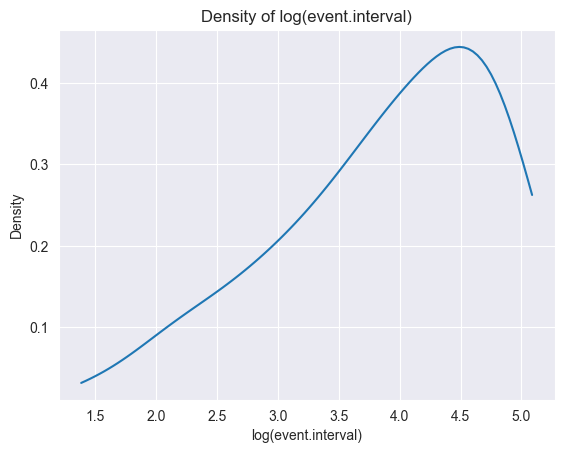

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

,pnr,eksd,perday,ATC,dur_original,Median,cluster
0,1,2033-04-26,4,medA,50,47.0,0.0
1,2,2036-01-20,4,medA,50,47.0,0.0
2,2,2036-03-10,4,medA,50,47.0,0.0
3,2,2036-08-01,4,medA,50,47.0,0.0
4,3,2042-04-13,4,medA,50,47.0,0.0


In [47]:
medA_see_kmc = See_KMeans('medA', simulated_df)

medA_see_kmc.head()

##### B. ATC = medB

C:\Users\Zeus\AppData\Local\Temp\ipykernel_54764\209281623.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))


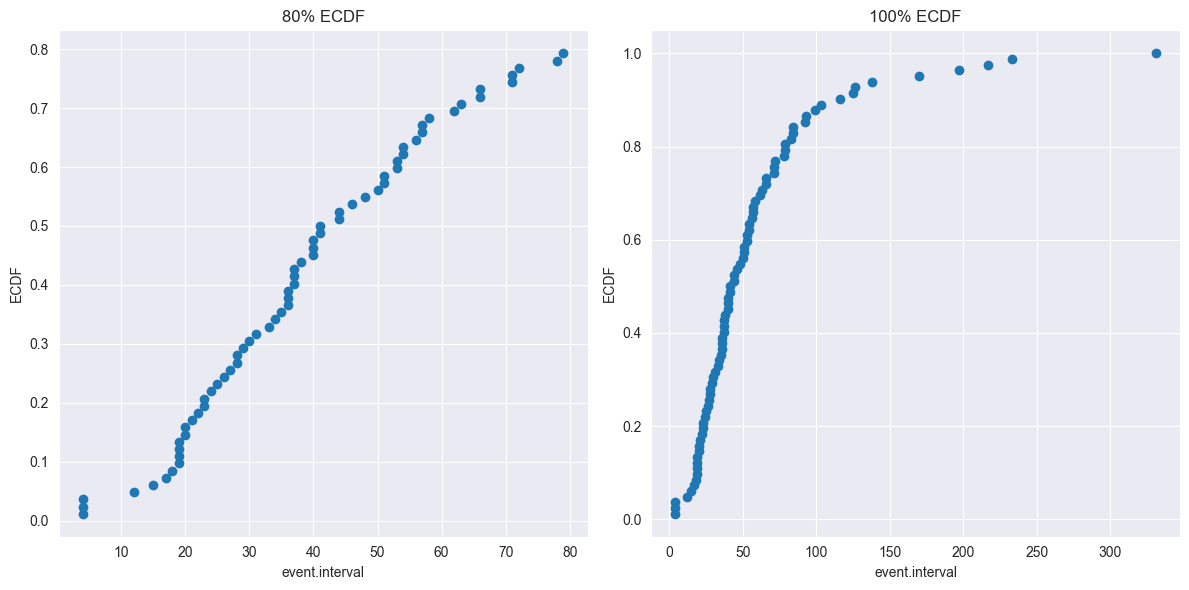

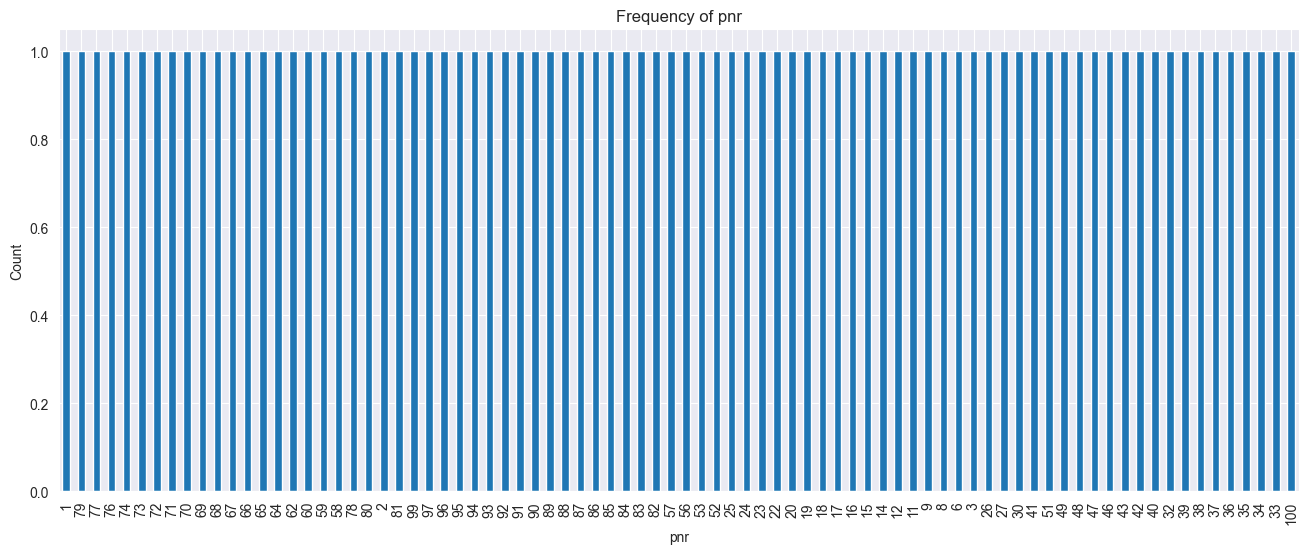

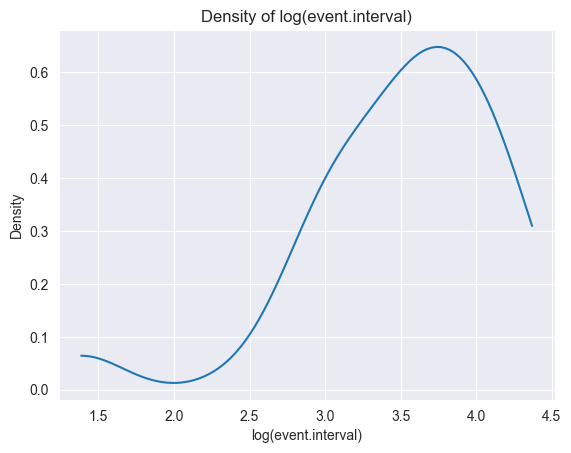

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

,pnr,eksd,perday,ATC,dur_original,Median,cluster
0,1,2033-07-04,4,medB,30,40.0,0.0
1,1,2033-08-03,4,medB,30,40.0,0.0
2,1,2033-08-17,4,medB,30,40.0,0.0
3,1,2033-10-13,4,medB,30,40.0,0.0
4,1,2033-10-16,4,medB,30,40.0,0.0


In [48]:
medB_see_kmc = See_KMeans('medB', simulated_df)

medB_see_kmc.head()

#### II. Sessa Empirical Estimator using DBSCAN

##### A. ATC = medA

C:\Users\Zeus\AppData\Local\Temp\ipykernel_54764\1576817157.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))


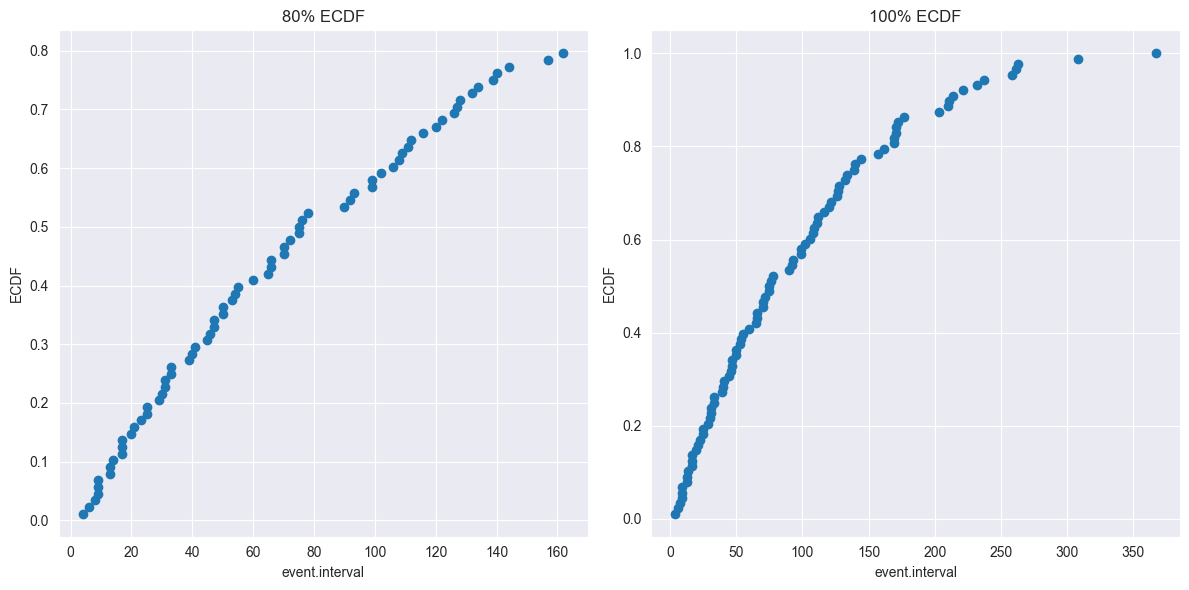

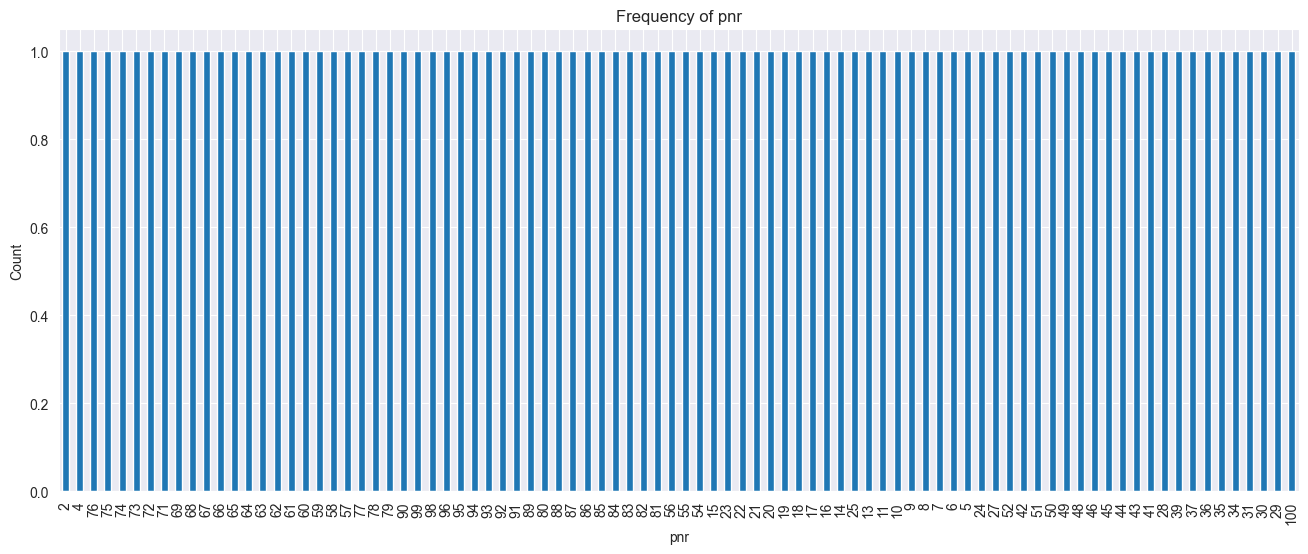

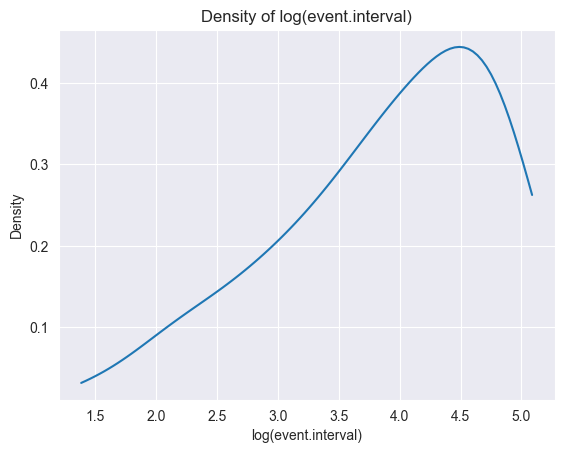

,pnr,eksd,perday,ATC,dur_original,Median,cluster
0,1,2033-04-26,4,medA,50,35.874782,0.0
1,2,2036-01-20,4,medA,50,35.874782,0.0
2,2,2036-03-10,4,medA,50,35.874782,0.0
3,2,2036-08-01,4,medA,50,35.874782,0.0
4,3,2042-04-13,4,medA,50,35.874782,0.0
...,...,...,...,...,...,...,...
566,99,2031-11-08,4,medA,50,232.000000,-1.0
567,99,2032-06-16,4,medA,50,232.000000,-1.0
568,99,2032-09-18,4,medA,50,232.000000,-1.0
569,100,2032-08-05,2,medA,150,232.000000,-1.0


In [49]:
medA_see_dbscan = See_DBSCAN('medA', simulated_df)

medA_see_dbscan

##### B. ATC = medB

C:\Users\Zeus\AppData\Local\Temp\ipykernel_54764\1576817157.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Drug_see_p1 = Drug_see_p1.groupby('pnr', group_keys=False).apply(lambda x: x.sample(1, random_state=1234))


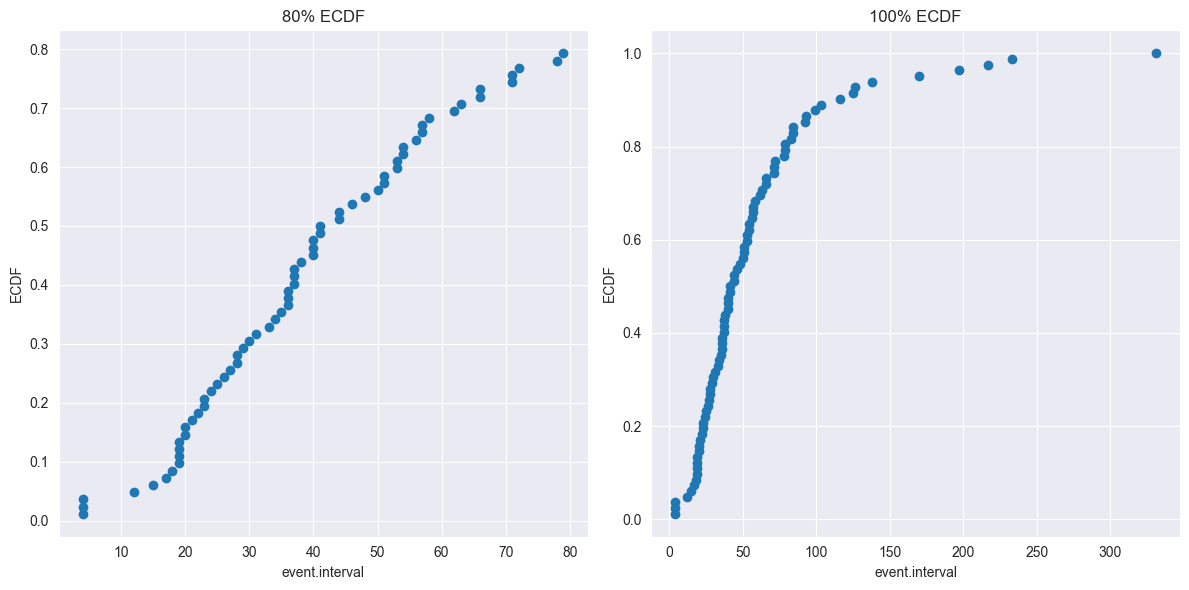

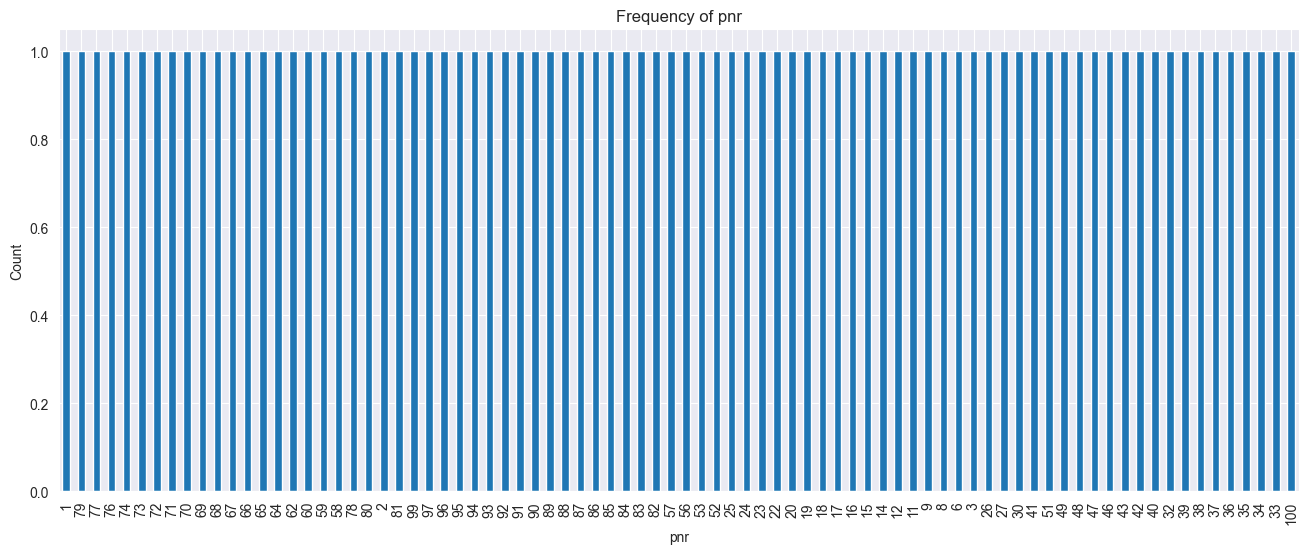

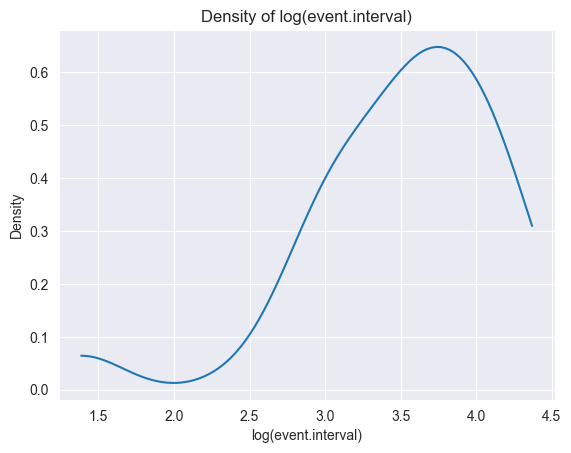

,pnr,eksd,perday,ATC,dur_original,Median,cluster
0,1,2033-07-04,4,medB,30,120.415946,-1.0
1,1,2033-07-04,4,medB,30,37.000000,0.0
2,1,2033-08-03,4,medB,30,120.415946,-1.0
3,1,2033-08-03,4,medB,30,37.000000,0.0
4,1,2033-08-17,4,medB,30,120.415946,-1.0


In [50]:
medB_see_dbscan = See_DBSCAN('medB', simulated_df)

medB_see_dbscan.head()

#### III. Assumption for Sessa Empirical Estimator using K Means

##### A. ATC = medA

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


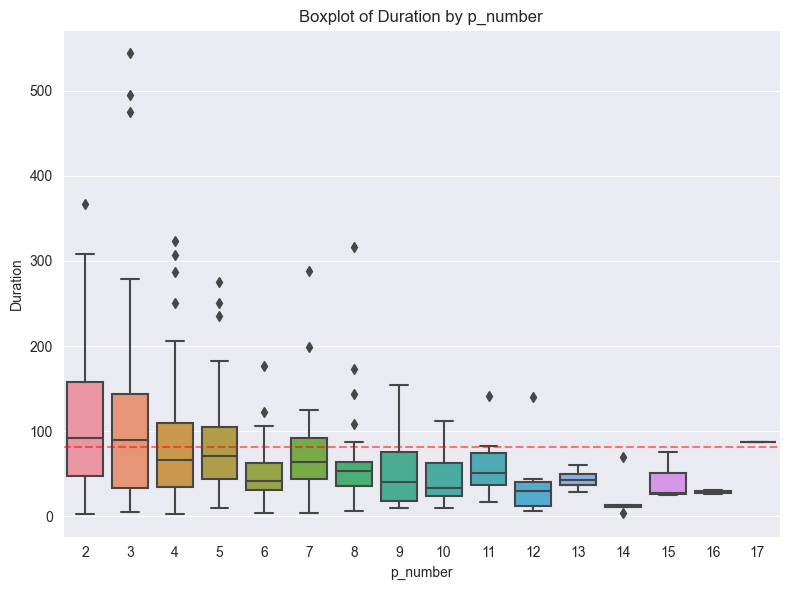

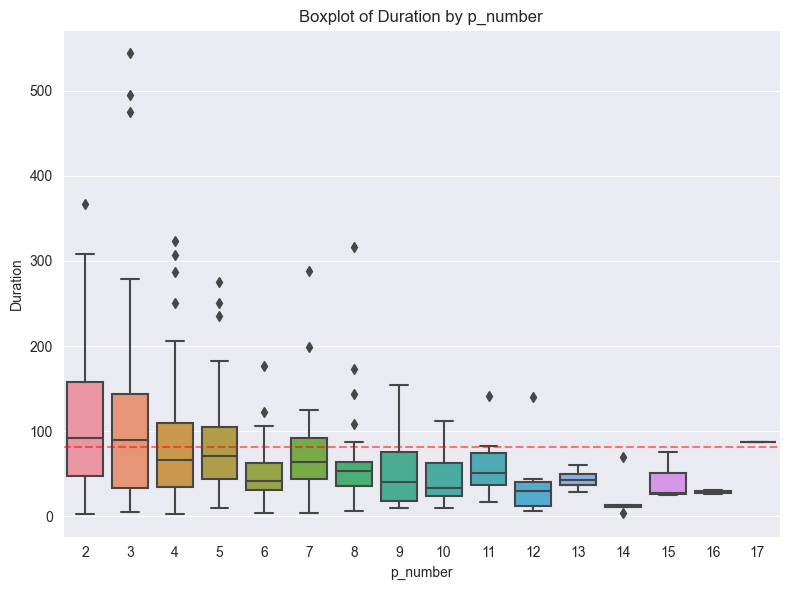

In [51]:
see_assumption(medA_see_kmc)

##### B. ATC = medB

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


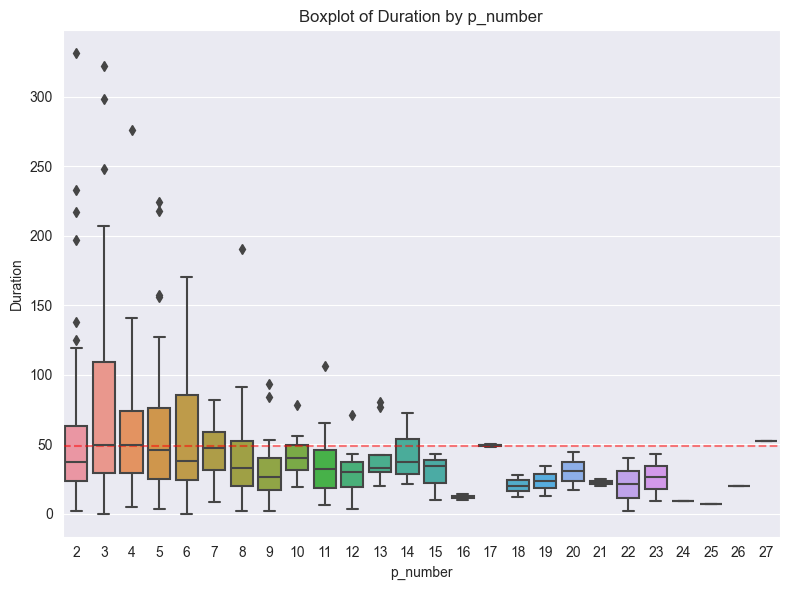

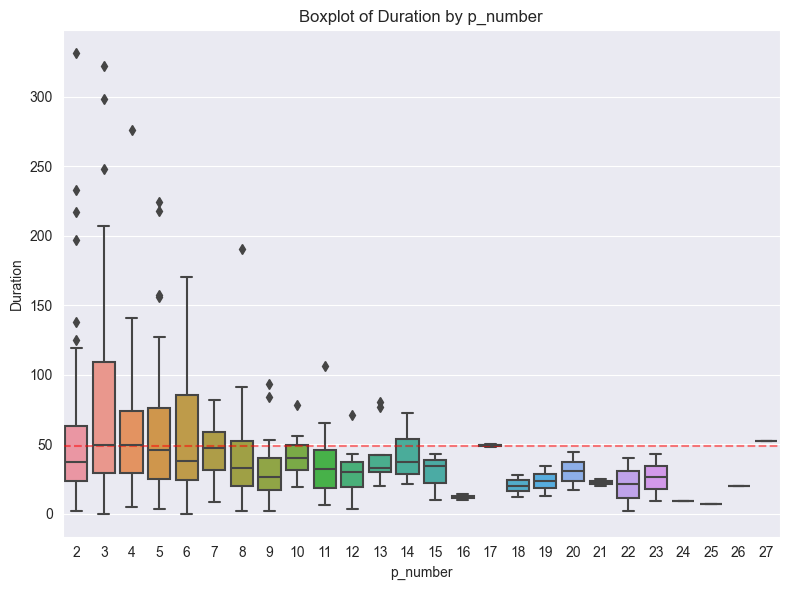

In [52]:
see_assumption(medB_see_kmc)

#### IV. Assumption for Sessa Empirical Estimator using DBSCAN

##### A. ATC = medA

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


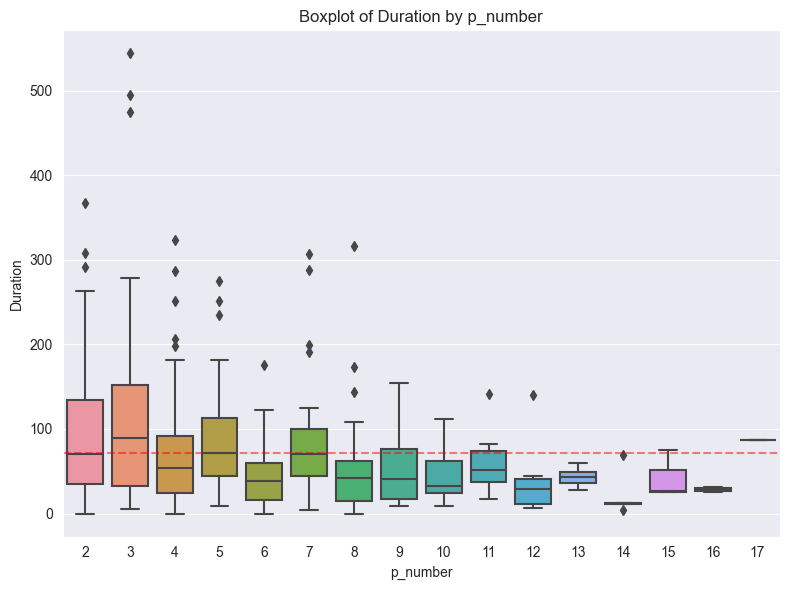

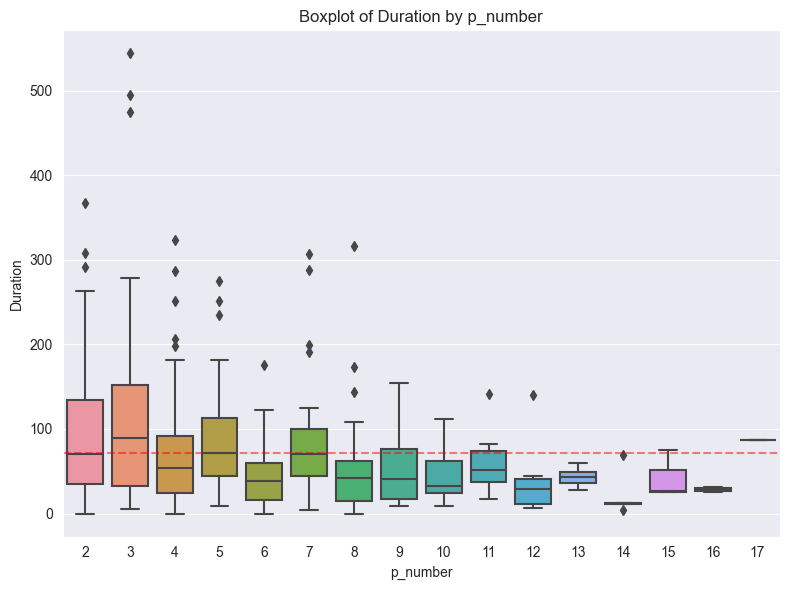

In [53]:
see_assumption(medA_see_dbscan)

##### B. ATC = medB

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


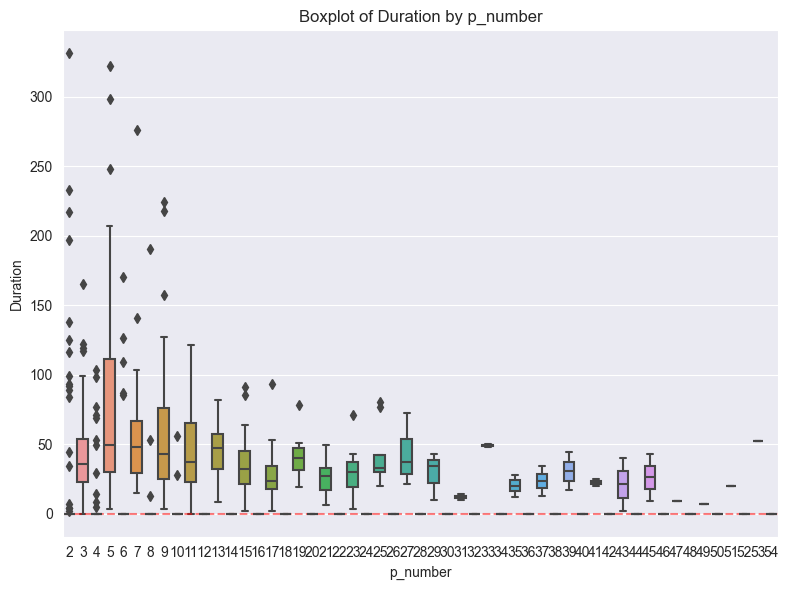

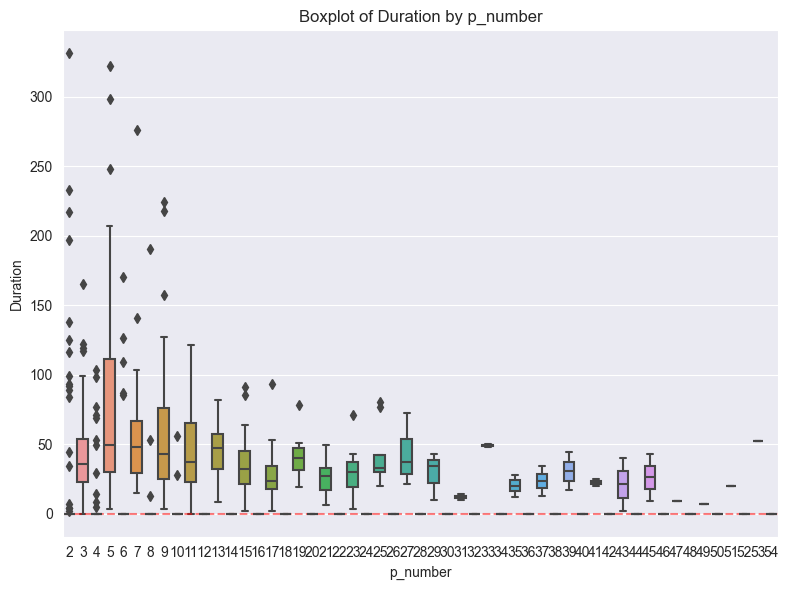

In [55]:
see_assumption(medB_see_dbscan)

### Observations From the SEE + KMeans Plots

#### A. Early Prescriptions Have Greater Variability

- In both medA and medB, the first few prescription numbers (e.g., p_number 2, 3, 4) show:
    - Large spreads in Duration values.
    - Outliers that can extend well above 100 days (in medA, up to ~500 days; in medB, up to ~300 days).
- This indicates that early refills are less predictable, potentially because patients are still establishing their medication routines.

#### B. Convergence in Later Prescriptions
- As p_number increases (e.g., beyond 10 for medA, beyond 15–20 for medB), the boxplots:
    - Become narrower, suggesting the refill intervals stabilize.
    - Have lower maximum durations and fewer extreme outliers.
- This pattern implies that patients tend to settle into more regular refill intervals after the initial few prescriptions.
#### C. Distinctions Between medA and medB
- Number of Prescriptions
    - medA: Up to 17 prescriptions are observed.
    - medB: Up to 27 prescriptions, indicating either longer treatment durations or more frequent refills.
- Overall Duration Range
    - medA: Outliers can reach 400–500 days early on, then settle below ~50–100 days.
    - medB: Outliers reach ~300 days, then drop to a steady range of ~20–60 days for later prescriptions.
- Median of Medians (the dashed red line)
    - The dashed line appears slightly higher for medA (somewhere in the ~50–60 day range).
    - For medB, it looks lower (around ~30–40 days).
    - This suggests medB patients, on average, have shorter refill intervals.

### Key Insights From the SEE + KMeans Plots
- Early Refill Irregularity
    - Both medA and medB show that first few refills have widely varying intervals. Clinicians or researchers might investigate why some patients go so long between the first and second prescriptions.
- Stabilization Over Time
    - For higher p_numbers, the intervals tighten considerably, reflecting more consistent adherence or regular refill schedules once patients are established on therapy.
- Different Refill Patterns by Medication
    - medB appears to have more total prescriptions and generally shorter intervals after the initial period. This could imply more frequent dosing or longer-term therapy.
    - medA shows fewer total refills but some extreme outliers in the earliest refills.
- Clinical or Operational Implications
    - Identifying Non-Adherence Early: Outliers in early p_number might indicate patients who are not following their regimen.
    - Forecasting Refill Demand: As patients progress, intervals become predictable, which can help with inventory management and patient follow-up.
    - Potential for Tailored Interventions: Patients whose refill intervals never stabilize (persistent outliers) might need extra support (e.g., reminders, counseling).